In [16]:
# invisible
lines = open("img_resolution.txt").readlines()
resolution = lines[0].strip()
if resolution != "default":
    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = int(resolution)

<br>



## Matplotlib-Tutorial: Histogramme

<img width="40%" class="imgright" src="../images/histogram_in_an_artful_way.webp" srcset="../images/histogram_in_an_artful_way_350w.webp 350w,../images/histogram_in_an_artful_way_300w.webp 300w" alt="A histogram in an artful way" />


Dieses Kapitel des Tutorials befasst sich mit Balken-, Säulendiagramme und Histogrammen.
Es ist schwierig eine Zeitung oder ein Magazin zu finden, in der keine Histogramme zu finden sind die etwas über die Anzahl der Raucher einer bestimmten Altergruppe oder die Anzahl der Geburten pro Jahr aussagen. Es ist eine gute Möglichkeit Fakten ohne viele Worte wiederzugeben. Auf der anderen Seite jedoch können sie auch zur Manipulation von Statistiken werden.

Was ist ein Histogramm? Eine formale Definition könnte sein: Es ist eine grafische Repräsentation einer Verteilung von numerischen Daten. Rechtecke mit der gleichen Breite haben Höhen, die den zugehörigen Frquenzen entsprechen.







Wenn wir ein Histogramm konstruieren, beginnen wir mit der Verteilung des Bereichs der möglichen x-Werte in gewöhnlich gleich große und benachbarte Klassen bzw. Intervalle, die man in Englisch Bins nennt. Die Daten werden nun entsprechend ihrer Größe in diese Bins verteilt.  Für jede Klasse bzw. Intervall werden dann Rechtecke gezeichnet, deren Höhe bzw. Flächeninhalt der relativen oder absoluten Häufigkeit der Klasse entspricht. 

Wir schreiben nun ein Python-Programm, indem wir Zufallszahlen erzeugen und aus diesen ein Histogramm erzeugen: 

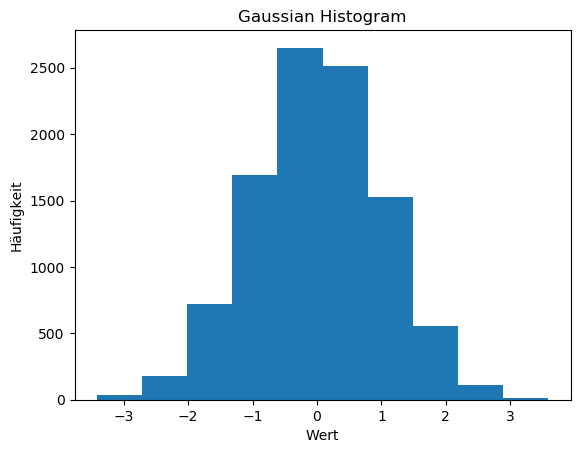

In [17]:
import matplotlib.pyplot as plt
import numpy as np

gaussian_numbers = np.random.normal(size=10000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.show()




Wir haben gesehen, dass die Funktion ```hist``` (eigentlich ```matplotlib.pyplot.hist```) die Histogrammwerte berechnet und den Graphen zeichnet. Außerdem gibt die Funktion auch ein Tupel mit drei Objekten ```(n, bins, patches)``` zurück:

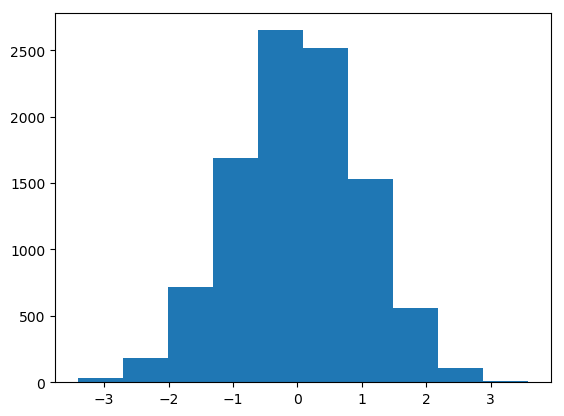

In [18]:
n, bins, patches = plt.hist(gaussian_numbers)

 Schauen wir uns die Rückgabewerte genauer an. Bei der Histogrammbildung werden die Zufallswerte von unserem Array ```gaussian_numbers``` in gleichgroße Intervalle aufgeteilt, d.h. die "bins". Die von ```hist``` berechneten Intervallgrenzen erhalten wir in der zweiten Komponente des Rückgabetupels. In unserem Beispiel werden sie mit der Variable ```bins``` bezeichnet:   

In [19]:
print("Die ersten drei 'bins': ", bins[0:3])

Die ersten drei 'bins':  [-3.41215556 -2.71239973 -2.0126439 ]


```n[i]``` enthält die Anzahl der Werte von ```gaussian_numbers```, die innerhalb des Intervalls mit den Grenzen ```bins[i]``` und ```bins[i+1]``` liegen:

In [20]:
print("n: ", n, sum(n))

n:  [  32.  182.  719. 1692. 2651. 2515. 1528.  558.  110.   13.] 10000.0


```n``` ist also ein Array mit den Häufigkeiten. Der letzte Rückgabewert von ```hist``` ist eine Liste ```patches```, was den Rechtecken mit ihren Eigenschaften entspricht:

In [21]:
print("patches: ", patches)
for i in range(10):
    print(patches[i])

patches:  <a list of 10 Patch objects>
Rectangle(xy=(-3.41216, 0), width=0.699756, height=32, angle=0)
Rectangle(xy=(-2.7124, 0), width=0.699756, height=182, angle=0)
Rectangle(xy=(-2.01264, 0), width=0.699756, height=719, angle=0)
Rectangle(xy=(-1.31289, 0), width=0.699756, height=1692, angle=0)
Rectangle(xy=(-0.613132, 0), width=0.699756, height=2651, angle=0)
Rectangle(xy=(0.0866236, 0), width=0.699756, height=2515, angle=0)
Rectangle(xy=(0.786379, 0), width=0.699756, height=1528, angle=0)
Rectangle(xy=(1.48614, 0), width=0.699756, height=558, angle=0)
Rectangle(xy=(2.18589, 0), width=0.699756, height=110, angle=0)
Rectangle(xy=(2.88565, 0), width=0.699756, height=13, angle=0)


10 Bins sind nicht viel, wenn wir von 10.000 Zufallszahlen sprechen. Deshalb erhöhen wir im folgenden Programm die Anzahl der Klassen. Dazu setzen wir den Schlüsselwort-Parameter ```bins``` auf 100:

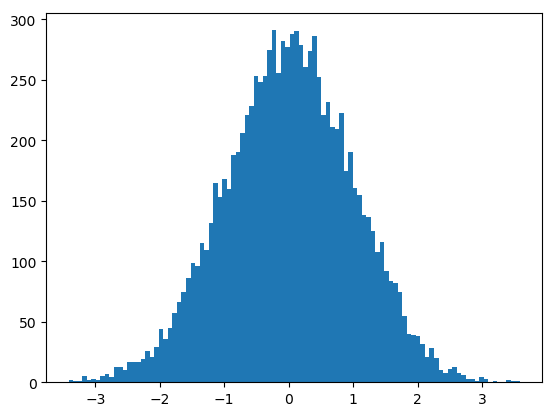

In [22]:
plt.hist(gaussian_numbers, bins=100)
plt.show()

Indem wir den Parameter ```orientation``` auf ```vertical``` setzen, können wir das Histogramm auch seitwärts ausgeben:

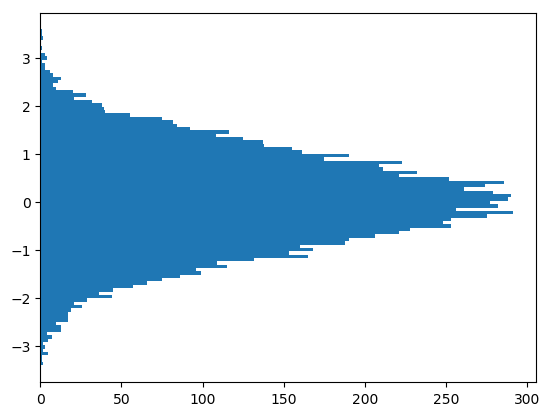

In [23]:
plt.hist(gaussian_numbers, bins=100, orientation="horizontal")
plt.show()

Ein weiterer wichtiger Schlüsselwort-Parameter von ```hist``` ist ```density```, der den veralteten Parameter ```normed``` ablöst. Falls er auf ```True``` gesetzt wird, wird die erste Komponente -- also die Häufigkeiten -- des Rückgabetupels normalisiert, um eine  Wahrscheinlichkeitsdichte zu bilden, d.h. die Fläche (oder das Integral) unter dem Histogramm bildet die Summe 1



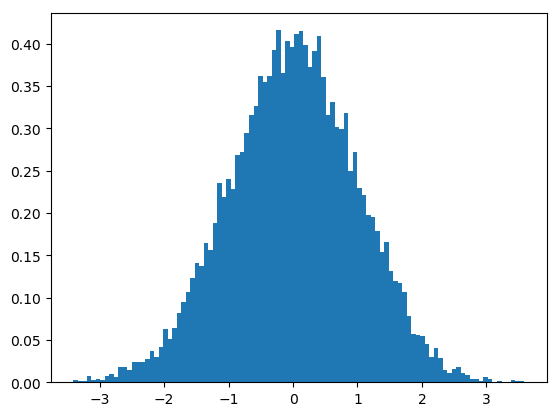

Fläche unter dem Integral:  1.0


In [24]:
n, bins, patches = plt.hist(gaussian_numbers, 
                            bins=100, 
                            density=True)
plt.show()
print("Fläche unter dem Integral: ", np.sum(n * np.diff(bins)))

Mit den Parametern ```edgecolor``` und ```color``` können wir die Linienfarbe und die Farbe der Flächen festlegen:

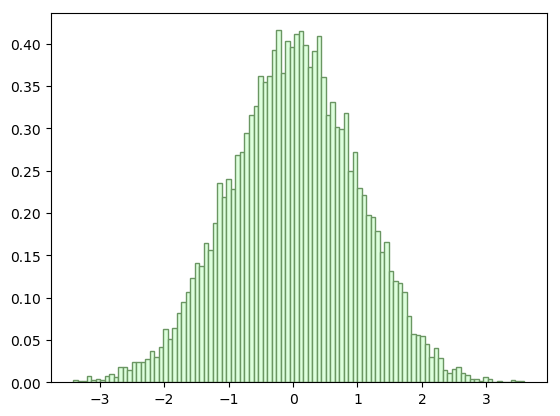

In [25]:
n, bins, patches = plt.hist(gaussian_numbers, 
                            bins=100, 
                            density=True, 
                            edgecolor="#6A9662",
                            color="#DDFFDD")
plt.show()

Okay, Sie möchten eine Darstellung von kumulierten Werten sehen? Wir können eine kumulative Verteilungs-Funktion ausgeben, indem wir den Paremter ```cumulative``` setzen.

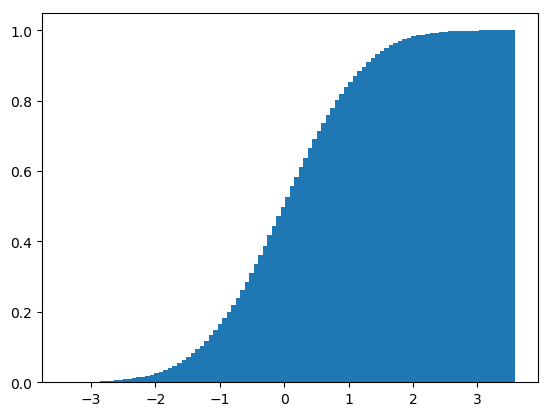

In [26]:
plt.hist(gaussian_numbers, 
         bins=100, 
         density=True,
         stacked=True,
         cumulative=True)

plt.show()

<br><br>

### Säulendiagramm



Nun kommen wir zu einem der am häufigsten benutzten Diagrammtypen, der auch unter  Nichtwissenschaftlern bestens bekannt ist. Das Säulendiagramm ist so benannt, weil es sich aus auf der x-Achse senkrecht stehenden Rechtecken zusammensetzt, die sich wie Säulen aufrichten. Ist die Breite der Säulen sehr schmal, werden sie auch als Stabdiagramm bezeichnet. Die Breite der Rechtecke hat keine mathematische Bedeutung. 

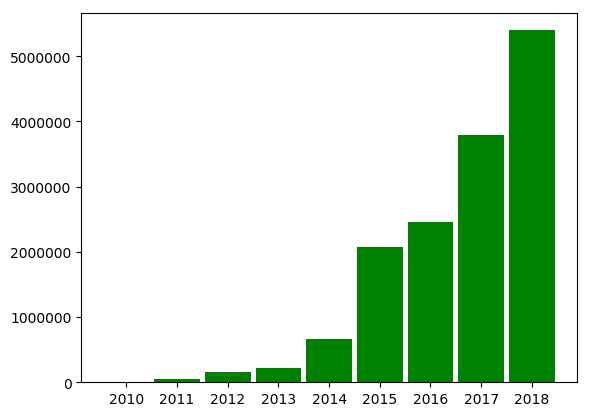

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#years = ('2010', '2011', '2012', '2013', '2014', '2015')
years = [str(year) for year in range(2010, 2019)]
visitors = (1241, 50927, 162242, 222093, 665004, 
            2071987, 2460407, 3799215, 5399000)

index = np.arange(len(years))
bar_width = 0.9
plt.bar(index, visitors, bar_width,  color="green")
plt.xticks(index, years) # labels get centered
plt.show()

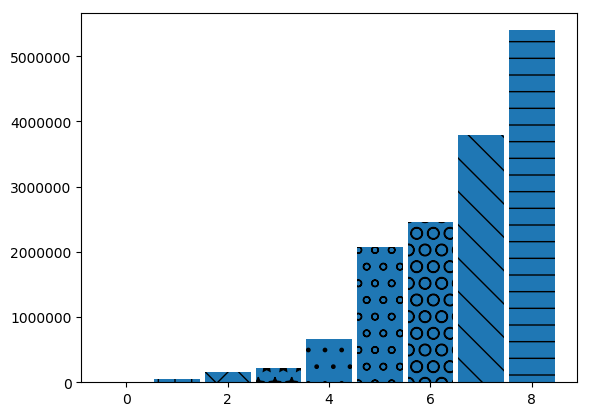

In [28]:
# prog4book
bars = plt.bar(index, visitors, bar_width)

patterns = ('-', '+', 'x', '*', '.', 'o', 'O', '\\', '-')
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.show()



<br><br>

### Balkendiagramme



Häufig werden Säulendiagramme auch fälschlicherweise als Balkendiagramme bezeichnet, da sie diesen sehr ähnlich sind. Bei dem Balkendiagramm sind die Rechtecke allerdings waagerecht orientiert. 

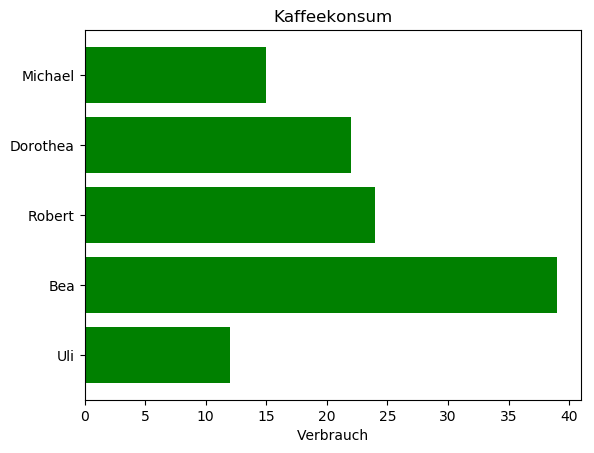

In [29]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# original default Parameter werden wiederhergestellt:
plt.rcdefaults() 
fig, ax = plt.subplots()

personen = ('Michael', 'Dorothea', 'Robert', 'Bea', 'Uli')
y_pos = np.arange(len(personen))
verbrauch = (15, 22, 24, 39, 12)

ax.barh(y_pos, verbrauch, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(personen)
ax.invert_yaxis()  # labels von oben nach unten
ax.set_xlabel('Verbrauch')
ax.set_title('Kaffeekonsum')

plt.show()

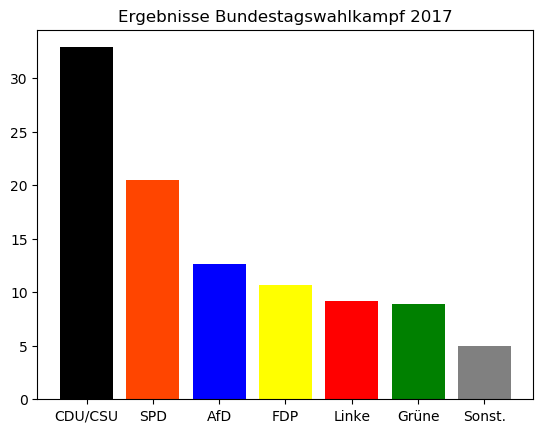

In [30]:
parteien = ["CDU/CSU", "SPD", "AfD", "FDP", "Linke", "Grüne", "Sonst."]
colors = ['black', 'orangered', 'blue',  'yellow',  'red', 'green', 'grey']
anteile = [32.9, 20.5, 12.6, 10.7, 9.2, 8.9, 5]

bars = plt.bar(parteien, anteile, color=colors)
plt.title("Ergebnisse Bundestagswahlkampf 2017")
plt.show()